This notebook analyzes cytoplasmic translocation for each gene using an averaged DR value. 

In [1]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from scipy.stats import *

In [2]:
drpath = '/stanley/WangLab/Connie/02.TEMPOmap/02.revisionCardiomyocyte64Gene/output'
apath = '/stanley/WangLab/Data/Processed/2022-09-30-Rena-Cardiomyocyte64Gene/output'
adata = sc.read_h5ad(os.path.join(apath, '2022-10-22-Rena-Cardiac64Gene-raw.h5ad'))
genes = adata.var.index
area_list = [2, 3, 5, 6]
area2sample = {
    1: 'STARmap',
    2: '2h_labeling_6h_wash', 
    3: '2h_labeling_4h_wash',
    4: '20h_labeling',
    5: '2h_labeling',
    6: '2h_labeling_2h_wash'
}

In [4]:
adata.obs['sample_'] = [area2sample[i] for i in adata.obs['sample']]
adata.obs

,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,sample_
0,0,1,1909030,207,12290,14,424563,13,0,58,4.077537,2492,7.821242,STARmap
1,1,1,938457,141,6935,16,254098,0,0,63,4.158883,2164,7.680176,STARmap
2,2,1,319251,74,10321,16,116817,1,0,48,3.891820,727,6.590301,STARmap
3,3,1,1391167,182,10073,14,57744,5,0,60,4.110874,1883,7.541152,STARmap
4,4,1,328536,79,5183,15,82780,1,0,46,3.850148,337,5.823046,STARmap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,1384,6,658458,20239,7082,14,233127,1,0,24,3.218876,170,5.141664,2h_labeling_2h_wash
9625,1385,6,318836,20220,9478,9,128602,2,2,27,3.332205,98,4.595120,2h_labeling_2h_wash
9626,1386,6,639378,20277,11077,12,127610,0,0,31,3.465736,142,4.962845,2h_labeling_2h_wash
9627,1387,6,345181,20281,12452,11,142509,2,0,37,3.637586,138,4.934474,2h_labeling_2h_wash


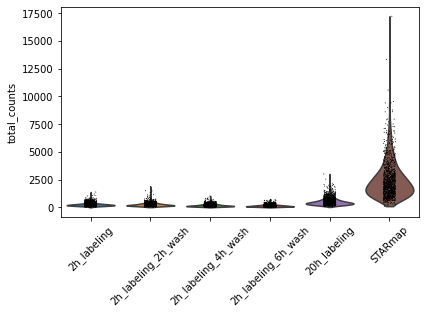

In [5]:
sc.pl.violin(adata, keys='total_counts', groupby='sample_', rotation=45)

In [12]:
# quick check
# test_gene = np.random.choice(genes)

In [6]:
adata.obs

,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,sample_
0,0,1,1909030,207,12290,14,424563,13,0,58,4.077537,2492,7.821242,STARmap
1,1,1,938457,141,6935,16,254098,0,0,63,4.158883,2164,7.680176,STARmap
2,2,1,319251,74,10321,16,116817,1,0,48,3.891820,727,6.590301,STARmap
3,3,1,1391167,182,10073,14,57744,5,0,60,4.110874,1883,7.541152,STARmap
4,4,1,328536,79,5183,15,82780,1,0,46,3.850148,337,5.823046,STARmap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,1384,6,658458,20239,7082,14,233127,1,0,24,3.218876,170,5.141664,2h_labeling_2h_wash
9625,1385,6,318836,20220,9478,9,128602,2,2,27,3.332205,98,4.595120,2h_labeling_2h_wash
9626,1386,6,639378,20277,11077,12,127610,0,0,31,3.465736,142,4.962845,2h_labeling_2h_wash
9627,1387,6,345181,20281,12452,11,142509,2,0,37,3.637586,138,4.934474,2h_labeling_2h_wash


In [8]:
# import cell type label
cell_type = pd.read_csv('/stanley/WangLab/Connie/02.TEMPOmap/02.revisionCardiomyocyte64Gene/Nov10_cardiac_cluster_label.csv')
cell_type

,Unnamed: 0,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,volume,n_volume,nCount_RNA,nFeature_RNA,RNA_snn_res.0.1,seurat_clusters
0,1051,0,2h_labeling_6h_wash,505671,96,12726,17,295630,2,1,22,3.135494,105,4.663439,505671,295630,105,22,0,0
1,1052,1,2h_labeling_6h_wash,307387,54,7831,17,101313,0,0,18,2.944439,77,4.356709,307387,101313,77,18,0,0
2,1053,2,2h_labeling_6h_wash,133770,50,8461,15,91892,1,1,10,2.397895,17,2.890372,133770,91892,17,10,1,1
3,1054,3,2h_labeling_6h_wash,617687,133,1382,16,125781,5,0,25,3.258097,55,4.025352,617687,125781,55,25,1,1
4,1055,4,2h_labeling_6h_wash,275230,75,14348,14,89334,0,0,12,2.564949,52,3.970292,275230,89334,52,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,9624,1384,2h_labeling_2h_wash,658458,20239,7082,14,233127,1,0,24,3.218876,170,5.141664,658458,233127,170,24,0,0
8467,9625,1385,2h_labeling_2h_wash,318836,20220,9478,9,128602,2,2,27,3.332205,98,4.595120,318836,128602,98,27,0,0
8468,9626,1386,2h_labeling_2h_wash,639378,20277,11077,12,127610,0,0,31,3.465736,142,4.962845,639378,127610,142,31,0,0
8469,9627,1387,2h_labeling_2h_wash,345181,20281,12452,11,142509,2,0,37,3.637586,138,4.934474,345181,142509,138,37,0,0


In [9]:
np.unique(cell_type['sample'])

array(['20h_labeling', '2h_labeling', '2h_labeling_2h_wash',
       '2h_labeling_4h_wash', '2h_labeling_6h_wash'], dtype=object)

In [17]:
# calculate dr_by_sample (each gene has one averaged DR per sample)
for area in area_list: # 2-6 excluding starmap, 20h
    # _adata = adata[adata.obs['sample']==area]
    dr = np.load(os.path.join(drpath, f'DR_area{area}.npy'), allow_pickle=True)
    avg_dr = np.zeros(dr.shape) # cell by gene 
    for i in range(dr.shape[0]):
        for j in range(dr.shape[1]):
            if type(dr[i,j]) == list:
                avg_dr[i,j] = np.average(dr[i,j])
            else: avg_dr[i,j] = np.nan 
    # filter cells (cell meta by Haowen)
    _cell_type = cell_type[cell_type['sample']==area2sample[area]]
    avg_dr_flt = avg_dr[np.isin(adata.obs[adata.obs['sample']==area]['orig_index'], _cell_type['orig_index'])]
    # separate cells by type
    ctype = _cell_type['seurat_clusters']
    avg_dr_cardiac = avg_dr_flt[ctype==0]
    avg_dr_fibroblast = avg_dr_flt[ctype==1]
    sample_dr_cardiac = np.nanmean(avg_dr_cardiac, axis=0)
    sample_dr_fibroblast = np.nanmean(avg_dr_fibroblast, axis=0)
    if area == 2: 
        dr_by_sample = pd.DataFrame(zip(genes, sample_dr_cardiac, [area2sample[area]]*(len(genes)), ['cardiac']*(len(genes))))
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_fibroblast, [area2sample[area]]*(len(genes)), ['fibroblast']*(len(genes))))], axis=0)
    else: 
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_cardiac, [area2sample[area]]*(len(genes)), ['cardiac']*(len(genes))))], axis=0)
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_fibroblast, [area2sample[area]]*(len(genes)), ['fibroblast']*(len(genes))))], axis=0)
dr_by_sample.columns = ['gene', 'dr', 'sample', 'cell_type']

/local/scratch/37250188.1.interactive/ipykernel_17220/320009378.py:18: RuntimeWarning: Mean of empty slice
  sample_dr_cardiac = np.nanmean(avg_dr_cardiac, axis=0)
/local/scratch/37250188.1.interactive/ipykernel_17220/320009378.py:19: RuntimeWarning: Mean of empty slice
  sample_dr_fibroblast = np.nanmean(avg_dr_fibroblast, axis=0)
/local/scratch/37250188.1.interactive/ipykernel_17220/320009378.py:18: RuntimeWarning: Mean of empty slice
  sample_dr_cardiac = np.nanmean(avg_dr_cardiac, axis=0)
/local/scratch/37250188.1.interactive/ipykernel_17220/320009378.py:19: RuntimeWarning: Mean of empty slice
  sample_dr_fibroblast = np.nanmean(avg_dr_fibroblast, axis=0)
/local/scratch/37250188.1.interactive/ipykernel_17220/320009378.py:18: RuntimeWarning: Mean of empty slice
  sample_dr_cardiac = np.nanmean(avg_dr_cardiac, axis=0)
/local/scratch/37250188.1.interactive/ipykernel_17220/320009378.py:19: RuntimeWarning: Mean of empty slice
  sample_dr_fibroblast = np.nanmean(avg_dr_fibroblast, axis=0

In [18]:
dr_by_sample

,gene,dr,sample,cell_type
0,ATP2A2,0.745007,2h_labeling_6h_wash,cardiac
1,PLN,0.780333,2h_labeling_6h_wash,cardiac
2,TNNI1,0.780122,2h_labeling_6h_wash,cardiac
3,TNNT2,0.773151,2h_labeling_6h_wash,cardiac
4,TNNI3,0.778170,2h_labeling_6h_wash,cardiac
...,...,...,...,...
59,DCN,0.700548,2h_labeling_2h_wash,fibroblast
60,PDGFRA,0.732374,2h_labeling_2h_wash,fibroblast
61,FN1,0.723588,2h_labeling_2h_wash,fibroblast
62,TRPM3,0.706910,2h_labeling_2h_wash,fibroblast


<AxesSubplot:ylabel='Count'>

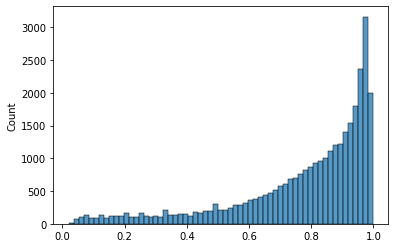

In [19]:
sns.histplot(avg_dr.flatten())

<AxesSubplot:xlabel='dr', ylabel='Count'>

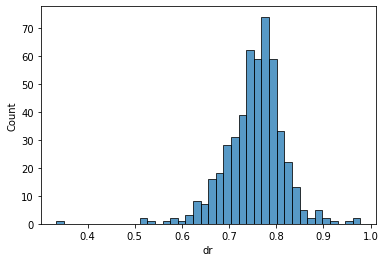

In [20]:
sns.histplot(dr_by_sample['dr'])

In [21]:
np.count_nonzero(np.isnan(dr_by_sample['dr']))

14

In [22]:
# sample to timepoints
area2tp = {
    '2h_labeling': 0, 
    '2h_labeling_2h_wash': 2, 
    '2h_labeling_4h_wash': 4,
    '2h_labeling_6h_wash': 6
}
tp = []
for i in range(len(dr_by_sample)):
    tp.append(area2tp[dr_by_sample.iloc[i]['sample']]) 
dr_by_sample['time_points'] = tp

In [23]:
dr_by_sample.sort_values(by='time_points', inplace=True)
dr_by_sample

,gene,dr,sample,cell_type,time_points
63,CTNNA2,0.596100,2h_labeling,fibroblast,0
29,ACTA1,0.807347,2h_labeling,fibroblast,0
28,ATP2B1,0.792133,2h_labeling,fibroblast,0
27,CASQ1,0.686090,2h_labeling,fibroblast,0
26,CAMK2D,0.662682,2h_labeling,fibroblast,0
...,...,...,...,...,...
28,ATP2B1,0.656739,2h_labeling_6h_wash,fibroblast,6
29,ACTA1,0.840116,2h_labeling_6h_wash,fibroblast,6
30,SOX9,0.790942,2h_labeling_6h_wash,fibroblast,6
0,ATP2A2,0.775528,2h_labeling_6h_wash,fibroblast,6


In [24]:
# regress
## test
test = 'ATP2A2'
x = dr_by_sample[np.logical_and(dr_by_sample['gene']==test, dr_by_sample['cell_type']=='fibroblast')]['time_points']
y = dr_by_sample[np.logical_and(dr_by_sample['gene']==test, dr_by_sample['cell_type']=='fibroblast')]['dr']
reg_test = linregress(x, y)
print(x, y, reg_test)

0    0
0    2
0    4
0    6
Name: time_points, dtype: int64 0    0.752604
0    0.813560
0    0.786796
0    0.775528
Name: dr, dtype: float64 LinregressResult(slope=0.002100441718537649, intercept=0.7758207721482765, rvalue=0.21409602492223348, pvalue=0.7859039750777665, stderr=0.006776388474636292, intercept_stderr=0.025354923991772683)


In [25]:
## all genes
LR = []
for gene in genes:
    x1 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='cardiac')]['time_points']
    y1 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='cardiac')]['dr']
    reg1 = linregress(x1, y1)
    x2 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='fibroblast')]['time_points']
    y2 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='fibroblast')]['dr']
    reg2 = linregress(x2, y2)
    LR.append([gene, reg1.slope, reg1.rvalue**2, reg2.slope, reg2.rvalue**2])
df = pd.DataFrame(LR, columns=['gene', 'slope_cardiac', 'r^2_cardiac', 'slope_fibroblast', 'r^2_fibroblast'])
df

,gene,slope_cardiac,r^2_cardiac,slope_fibroblast,r^2_fibroblast
0,ATP2A2,-0.001622,0.264158,0.002100,0.045837
1,PLN,-0.002814,0.502387,-0.003390,0.128929
2,TNNI1,-0.002921,0.364153,0.007208,0.277173
3,TNNT2,0.000007,0.000003,0.014094,0.854017
4,TNNI3,-0.001585,0.076080,0.012417,0.542524
...,...,...,...,...,...
59,DCN,0.016609,0.733188,0.007078,0.279326
60,PDGFRA,0.005406,0.675184,0.005701,0.326481
61,FN1,0.006615,0.160717,0.005921,0.475215
62,TRPM3,0.012558,0.630584,0.005264,0.398742


In [26]:
df.to_csv(os.path.join(drpath, 'cardiac_dr_regression_byCellType_flt.csv'))

<AxesSubplot:ylabel='Count'>

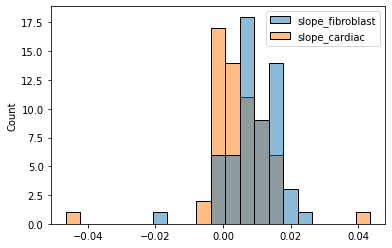

In [27]:
sns.histplot([df['slope_fibroblast'], df['slope_cardiac']])